# Análise das licitações de João Pessoa e Campina Grande

    * Ranking da quantidade de licitações feitas. 
    * Ranking do valor total das licitações (soma de todos os valores). 
    * Ranking das licitações de maior valor.
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lic = pd.read_csv("licitacao.txt", sep="|", dtype={'cd_ugestora': str,'de_ugestora': str,'nu_licitacao': str,
                                                   'tp_licitacao': float,'de_tipolicitacao': str, 'dt_homologacao': str, 
                                                   'tp_objeto': str,'de_tipoobjeto': str, 'vl_licitacao': int,'de_obs': str}, engine='python', error_bad_lines=False, encoding = 'utf8')
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})

Skipping line 135331: '|' expected after '"'
Skipping line 155831: '|' expected after '"'
Skipping line 163217: '|' expected after '"'


In [3]:
lic_mun = pd.merge(lic, jur, left_on="cd_ugestora", right_on="codigo_sagres", how="left")
lic_mun

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs,...,poder,tipojurisdicionado_fk,localidade_fk,nome,codigo_sagres,previdenciario,municipio_importacao,tramita_id,cancelled,esfera
0,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...,...,2.0,3.0,1435.0,Câmara Municipal de Capim,101052,False,Capim,71.0,False,1.0
1,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
2,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
3,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
4,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
5,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
6,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
7,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
8,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
9,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER...",...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0


In [4]:
jp = lic_mun['de_ugestora'].groupby(lic_mun['municipio_importacao']).get_group('João Pessoa')
cg = lic_mun['de_ugestora'].groupby(lic_mun['municipio_importacao']).get_group('Campina Grande')

Text(0.5, 0, 'Quantidade de licitações')

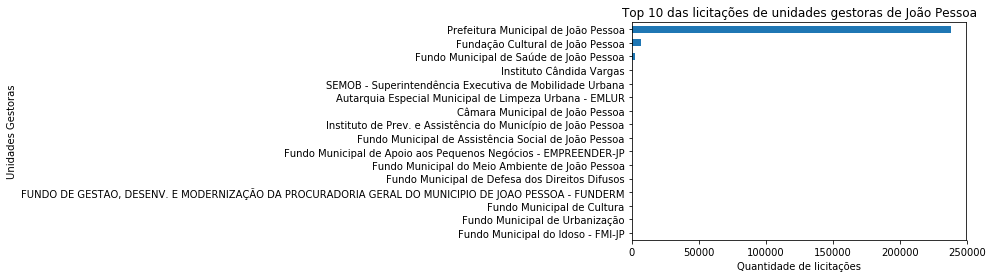

In [121]:
licfeitasjp.plot(kind='barh').invert_yaxis()
plt.title("Top 10 das licitações de unidades gestoras de João Pessoa")
plt.ylabel('Unidades Gestoras')
plt.xlabel('Quantidade de licitações')

In [5]:
#Ranking da quantidade de licitações feitas em João Pessoa.
licfeitasjp = jp.value_counts()
licfeitasjp

Prefeitura Municipal de João Pessoa                                                                    237880
Fundação Cultural de João Pessoa                                                                         6926
Fundo Municipal de Saúde de João Pessoa                                                                  2139
Instituto Cândida Vargas                                                                                  390
SEMOB - Superintendência Executiva de Mobilidade Urbana                                                   334
Autarquia Especial Municipal de Limpeza Urbana - EMLUR                                                    327
Câmara Municipal de João Pessoa                                                                           253
Instituto de Prev. e Assistência do Município de João Pessoa                                              187
Fundo Municipal de Assistência Social de João Pessoa                                                      179
Fundo Muni

Text(0.5, 0, 'Quantidade de licitações')

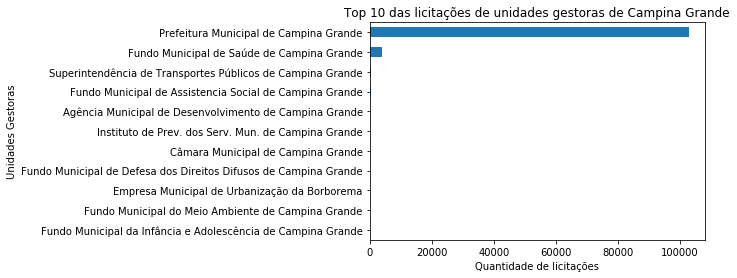

In [122]:
licfeitascg.plot(kind='barh').invert_yaxis()
plt.title("Top 10 das licitações de unidades gestoras de Campina Grande")
plt.ylabel('Unidades Gestoras')
plt.xlabel('Quantidade de licitações')

In [120]:
#Ranking da quantidade de licitações feitas em Campina Grande.
licfeitascg = cg.value_counts()
licfeitascg

Prefeitura Municipal de Campina Grande                              102938
Fundo Municipal de Saúde de Campina Grande                            3947
Superintendência de Transportes Públicos de Campina Grande             523
Fundo Municipal de Assistencia Social de Campina Grande                481
Agência Municipal de Desenvolvimento de Campina Grande                 101
Instituto de Prev. dos Serv. Mun. de Campina Grande                     65
Câmara Municipal de Campina Grande                                      62
Fundo Municipal de Defesa dos Direitos Difusos de Campina Grande        51
Empresa Municipal de Urbanização da Borborema                           50
Fundo Municipal do Meio Ambiente de Campina Grande                      42
Fundo Municipal da Infância e Adolescência de Campina Grande            34
Name: de_ugestora, dtype: int64

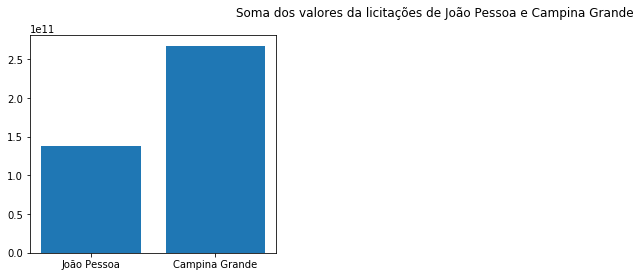

In [118]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.bar(municipios, valores)
plt.suptitle('Soma dos valores da licitações de João Pessoa e Campina Grande')
plt.show()

In [28]:
#Ranking do valor total das licitações (soma de todos os valores).
vllicjp = lic_mun['vl_Licitacao'].groupby(lic_mun['municipio_importacao']).get_group('João Pessoa').sum()
vlliccg = lic_mun['vl_Licitacao'].groupby(lic_mun['municipio_importacao']).get_group('Campina Grande').sum()

In [54]:
vllicjp

138168028659.87997

In [55]:
vlliccg

267481762346.19293

In [100]:
municipios = ['João Pessoa', 'Campina Grande']
valores = [vllicjp, vlliccg]

Text(0.5, 0, 'Valor das licitações')

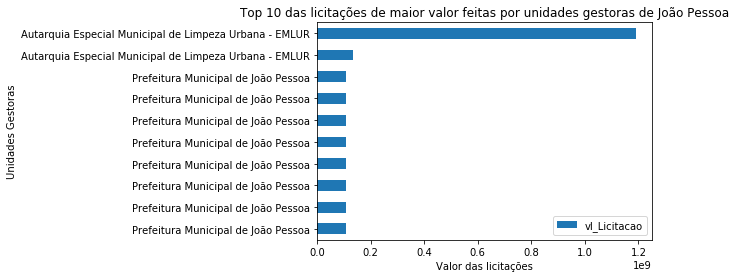

In [7]:
mljp.plot(kind='barh', x='de_ugestora', y='vl_Licitacao').invert_yaxis()
plt.title("Top 10 das licitações de maior valor feitas por unidades gestoras de João Pessoa")
plt.ylabel('Unidades Gestoras')
plt.xlabel('Valor das licitações')

In [6]:
#Ranking das licitações de maior valor das unidades gestoras de João Pessoa.
maiorlicjp = lic_mun[['de_ugestora','vl_Licitacao','de_Obs','nome']].groupby(lic_mun['municipio_importacao']).get_group('João Pessoa')
mljp = maiorlicjp.nlargest(10, ['vl_Licitacao'])
mljp

,de_ugestora,vl_Licitacao,de_Obs,nome
455712,Autarquia Especial Municipal de Limpeza Urbana...,1.190530e+09,"Contratação de empesas de engenharia,especiali...",Autarquia Especial Municipal de Limpeza Urbana...
454799,Autarquia Especial Municipal de Limpeza Urbana...,1.355629e+08,Valor Contratação de empresa de engenharia esp...,Autarquia Especial Municipal de Limpeza Urbana...
281110,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Secretaria da Infra-Estrutura do Município de ...
281111,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Prefeitura Municipal de João Pessoa
281112,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...","Secretaria de Planejamento, Desenv. Urbano e M..."
281113,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Procuradoria Geral do Município de João Pessoa
281114,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Secretaria Municipal de Planejamento de João P...
281115,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Secretaria Municipal de Proteção e Defesa do C...
281116,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Secretaria de Turismo de João Pessoa
281117,Prefeitura Municipal de João Pessoa,1.092200e+08,"AQUIS. DE CÂMERAS, CEL. E MP4 PARA PREMIAÇÃO D...",Chefia de Gabinete do Prefeito de João Pessoa


Text(0.5, 0, 'Valor das licitações')

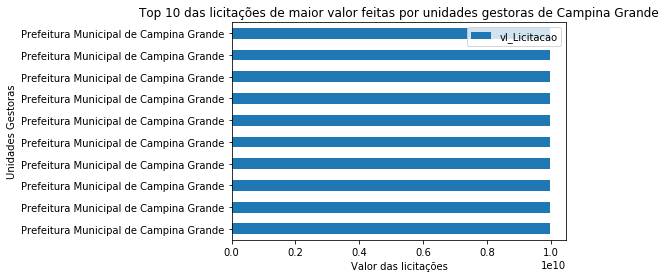

In [9]:
mlcg.plot(kind='barh', x='de_ugestora', y='vl_Licitacao').invert_yaxis()
plt.title("Top 10 das licitações de maior valor feitas por unidades gestoras de Campina Grande")
plt.ylabel('Unidades Gestoras')
plt.xlabel('Valor das licitações')

In [8]:
#Ranking das licitações de maior valor das unidades gestoras de Campina Grande.
maiorliccg = lic_mun[['de_ugestora','vl_Licitacao','de_Obs','nome']].groupby(lic_mun['municipio_importacao']).get_group('Campina Grande')
mlcg = maiorliccg.nlargest(10, ['vl_Licitacao'])
mlcg

,de_ugestora,vl_Licitacao,de_Obs,nome
115514,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Prefeitura Municipal de Campina Grande
115515,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Gabinete do Vice-Prefeito de Campina Grande
115516,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Secretaria Municipal de Desenvolvimento Econôm...
115517,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Secretaria da Administração de Campina Grande
115518,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...","Secretaria de Esporte, Juventude e Lazer de Ca..."
115519,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Secretaria do Planejamento e Gestão de Campina...
115520,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Procuradoria Geral do Município de Campina Grande
115521,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Secretaria de Agricultura da Prefeitura Munici...
115522,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Secretaria de Saúde de Campina Grande
115523,Prefeitura Municipal de Campina Grande,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",Secretaria de Finanças de Campina Grande
